# Get SR data

In [2]:
import pandas as pd
import numpy as np

worry_data=pd.read_csv('../../../raw_data/fs_qs.csv')
print('# Males={}'.format(np.sum(1*(worry_data['Response']=='Male'))))
print('# Females={}'.format(np.sum(1*(worry_data['Response']=='Female'))))


# Males=71
# Females=47


In [44]:
import pandas as pd
import numpy as np

#set up variables
PSWQ_Scores=[]
id_col='Participant External Session ID'
female_subs=[]
reverse_scored=[1,3,8,10,11]
rs_dict={1:5,2:4,3:3,4:2,5:1}
current_score=0
reverse_score_counter=0
counter=0
IDs=['Holder']
sc=-1
#get row locations where PSWQ items are
ilocs=[]

#check if they faithfully filled out the questionnaire
rs_items=[]
non_rs_items=[]
sub=1
c_id=1
for row,data in worry_data.iterrows():
    if worry_data['Response'][row]=='Female':
        female_subs.append(worry_data[id_col][row])
    if str(worry_data['Question Key'][row])=='BEGIN QUESTIONNAIRE' or row==17372:

        sc+=1
       
        if row!=0:
            PSWQ_Scores.append(current_score)
            if current_score==0:
                print(str(worry_data[id_col][row-5]))
            if str(worry_data[id_col][row])!=IDs[c_id-1]:
            
                IDs.append(str(worry_data[id_col][row-5]))
                c_id+=1
        current_score=0
        reverse_score_counter=0
        counter=0
#         print('\n Reverse_Score_Check for Subject {}'.format(sub))
#         print('RS avg: {}'.format(np.mean(rs_items)))
#         print('NON RS avg: {}'.format(np.mean(non_rs_items)))
#         print('\n')
        sub+=1
        rs_items=[]
        non_rs_items=[]

    
    elif str(worry_data['Question Key'][row]).startswith('ps') and not str(worry_data['Question Key'][row]).endswith('quantised'):
        if len(worry_data['Question Key'][row])>5:
            if int(worry_data['Question Key'][row][-2:]) in reverse_scored:
                rs_items.append(int(worry_data['Response'][row]))
                current_score+=rs_dict[int(worry_data['Response'][row])]
                counter+=1
                reverse_score_counter+=1
                ilocs.append(row)
            else:
                non_rs_items.append(int(worry_data['Response'][row]))
                current_score+=int(worry_data['Response'][row])
                counter+=1
                ilocs.append(row)
        else:
            if int(worry_data['Question Key'][row][-1]) in reverse_scored:
                rs_items.append(int(worry_data['Response'][row]))
                current_score+=rs_dict[int(worry_data['Response'][row])]
                counter+=1
                reverse_score_counter+=1
                ilocs.append(row)
            else:
                current_score+=int(worry_data['Response'][row])
                non_rs_items.append(int(worry_data['Response'][row]))
                counter+=1
                ilocs.append(row)
            
#np.save('PSWQ_Scores_ordered',PSWQ_Scores)
print('Mean on PSWQ =\n {}'.format(np.mean(PSWQ_Scores)))
print('\n')

print('SD on PSWQ =\n {}'.format(np.std(PSWQ_Scores)))
print('\n')


print('# of subs = {}'.format(len(PSWQ_Scores)))

print(len(PSWQ_Scores))
print(PSWQ_Scores)
print(IDs)
del IDs[0]


NameError: name 'worry_data' is not defined

# Get Choice data

In [109]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr as corrS
from scipy.stats import ttest_ind
#load  in data and just consider columsn of importance for analysis
df_task1=pd.read_csv('../../../raw_data/temp_data.csv')

# worry_scores=np.load('worry_scores.npy')

df_task_v1=df_task1[['Participant External Session ID','Participant Public ID','Correct','display','forced_choice','forced_choice_response','Response','image2','test_image1', 
                   'test_image2','distractor_key','distractor','Reaction Time']]

female_subs=['5dda763afef7c29d76b5ebb8', '5dda76da332b349d75a6c899', '5dda7fb51042009e47e31b40', 
             '5dda816b946f7c9ebebef8b1', '5dda98fea9ead09f2fe610b2', '5dda9d481228d99fc314a0f8', 
             '5dda9f88eb39739eee1bb7b1', '5dda9f86e0b21ba05698e708', '5ddaa1b1954d199f6cb79e4e', 
             '5ddaa1a441fb3f9eff92b44a', '5ddaa507f30aa6a0bc3a80d5', '5ddaae99e4bf20a0094d79dc', 
             '5ddab1e0ca7466a0caabaf3b', '5ddab71e370810a146f0a329', '5ddabc6f270f44a124b3624d', 
             '5ddabcc0e73e61a059c6d461', '5ddabc91954d19a0262c7d57', '5ddacc22326992a224af9c85', 
             '5ddacf88e454cda1fb817f01', '5ddad1781b28c0a2ff8cd077', '5ddad64af290e7a32145e61e', 
             '5ddadba67b6a66a42824ed06', '5ddadd504b0e0ca3462ef32f', '5ddae010326992a384c62f86', 
             '5ddae3b2108b67a3a58ac425', '5ddae7d8798297a46fa8c707', '5ddae8ea1f179ea36c192532', 
             '5ddaece783e309a5cfb5a0b9', '5ddaed2a88747d000e495999', '5ddaef431b28c0a464bc5e3f', 
             '5ddaf3d6c0823fa59a54aa68', '5ddb09d7961cb3a6259dcc47', '5ddb0c352b033ba76f637059', 
             '5ddb25137beb29a882334a35', '5ddb2d202c5c10a9417503c9', '5ddb358fe426bda89932a528', 
             '5ddb42c87beb29a9eb4425cc', '5ddb435ccf8e7eaa62855469', '5ddb8200d3ac2ac8557f67ba', 
             '5ddb88269c84d8ace7351ac1', '5ddbac7d9d9e30aec47b22e9', '5ddbc8467af661b198383544', 
             '5ddbc891572604b04472c313', '5ddbdba7322886b217676563', '5ddbdbfa82a527b242685aca', 
             '5ddbe185c23e0db210d1689c', '5ddbe2661c219bb2474db216']

bad_subs=['5ce1753c58949f0018561140', '5d965e897fc0400012122f01', 
          '5d231ff9b7ca9a00017d8a60', '5dab0a3344c3570017c44050', '5ca9f1578d77140001bac8dc', 
          '5d5f29422af6560001daa4d9', '5cd0bd449a3100000105b1f8', '5cc43f813bbb120018a3ba6f', 
          '5c4c4d88620ba700010c0609', '5d23433454fc1400185fd7ad', '5d233b3bbd63000019d6352a', 
          '5ce472eb6f921a0019851811', '5daf354ecc21350014f642b5', '5d4a996b1bff1d000144fae6', 
          '5d8bab1fe56317001711a90c', '5d2766f6ea08a7001929dc51', '5ca51b3dcecc270001429de4', 
          '5c62f95f68fb190001cdbd72', '5d9300595e910d001544b53a', '5c6d3aa621abf3000195da7b', 
          '5c7d411cde6f79001649bf84', '5dd24e4780628726547d424e', '5d69689dcfef9f001aa86408', 
          '5d678decbf4f9a00199936aa', '5d82181c9ad7940001529bf6', '5cf941e128fca6000126c55c']

correct_answer_dict={}

df_task_r=df_task_v1
print(df_task_r.shape)
#best answers per condition: lists
rt1=[]
rto=[]
rtf=[]
rp1=[]
rpf=[]
rpo=[]
cp1=[]
cpf=[]
cpo=[]
n2=[]
n2f=[]
n2o=[]
ct1=[]
ctf=[]
cto=[]
n1=[]
n1f=[]
n1o=[]
cs=0
#count missing entries per condition
mrt1=0
mrp1=0
mcp1=0
mct1=0
mn2=0
fif_row=1
missing=0
acceptable_answers=['1','0',1,0]

all_sub_IDs=[]
value_differential=[]
miss_subs=[]

#subject specific data
rt_sub=[]
ct_sub=[]
rp_sub=[]
cp_sub=[]
neut2_sub=[]
neut1_sub=[]
worry_scores_bad_rt1=[]
worry_scores_good_rt1=[]
t_counter=0
current_acceptable=0
n_count=0
ca=0 #unaccepted subs
sub_counter=0
choice_data_3d=np.zeros((90,5,1)) #to be populated below
for version in range(1):
    final_row=61920
    temp_row=[]
    test_counter=0
    counter=0
    conditions=[]
    best_action_tally=0
    condition_counter=0
    temp_dict={}
    current_subject=0
    current_choice_data=[]
    guesses=0
    good_subs=0
    skip2=0
    tot_test=0
    common_consecutive_zero=0
    common_consecutive_one=0
    for row,data in df_task_r.iterrows():
        
        #check if participant is elgibile from rule-out question
        if df_task_r['display'][row]=='practice_rest':
            if df_task_r['Response'][row] in acceptable_answers:
                if int(df_task_r['Correct'][row])==1:
                    current_acceptable=1
        
        if df_task_r['display'][row]=='practice_rest2':
            if df_task_r['Response'][row] in acceptable_answers:
                if int(df_task_r['Correct'][row])==0:
                    current_acceptable=0
                else:
                    current_acceptable=1
                
                    
              
             
            
                
        if 'rarest' in str(df_task_r['distractor_key'][row]):
            fifty_image=df_task_r['image2'][row]
      
        elif 'rare.' in str(df_task_r['distractor_key'][row]):
            if str(df_task_r['display'][row])=='fifty':
                test_thresh=4
            else:
                test_thresh=6
        elif 'common' in str(df_task_r['distractor_key'][row]):
            if df_task_r['forced_choice_response'][row]==0:
                if common_consecutive_zero==0:
                    common_consecutive_zero+=1
                    current_row=row
                elif row == current_row+1:
                    common_consecutive_zero+=1
                    current_row=row
                else:
                    common_consecutive_zero=0
            
            elif int(df_task_r['forced_choice_response'][row])==1:
                if common_consecutive_one==0:
                    common_consecutive_one+=1
                    current_row=row
                elif row == current_row+1:
                    common_consecutive_one+=1
                    current_row=row
                else:
                    common_consecutive_one=0
                                                                               
        elif str(df_task_r['display'][row]).startswith('test'):

            if counter==0:
#                 all_sub_IDs.append(df_task_r['Participant External Session ID'][row+20])
                counter+=1
            

    
            #for last subject only that doesn't meet the condition above for indexing
            if row==final_row:
                rp1.append(best_action_tally)
                all_sub_IDs.append(df_task_r['Participant External Session ID'][row])
               
                choice_data_3d[sub_counter,0]=neut2_sub
                choice_data_3d[sub_counter,1]=cp_sub
                choice_data_3d[sub_counter,2]=ct_sub
                choice_data_3d[sub_counter,3]=rp_sub
                choice_data_3d[sub_counter,4]=rt_sub
      
    
                sub_counter+=1
                condition_counter=0
                rt_sub=[]
                ct_sub=[]
                rp_sub=[]
                cp_sub=[]
                neut2_sub=[]
                neut1_sub=[]
          

            elif row<final_row:
                t_counter+=1
                if str(df_task_r['test_image1'][row]) != fifty_image:
                    if df_task_r['Response'][row] in acceptable_answers:
                        if float(df_task_r['Reaction Time'][row])<4999:
                            best_action_tally+=int(df_task_r['Correct'][row])
                            current_choice_data.append(int(df_task_r['Correct'][row]))
                        
                       
                        
                else:
                    if df_task_r['Response'][row] in acceptable_answers:
                        n_count+=int(df_task_r['Correct'][row])
                    else:
                        missing=1
                       
                        
                    
                
                
                if t_counter==test_thresh:
                    condition_counter+=1
                    conditions.append(df_task_r['display'][row][5:])
                    if conditions[counter-1]!='fifty':
                        if best_action_tally<2:
                            best_action_tally=0
                        else:
                            best_action_tally=1
                        
                    
                    if conditions[counter-1]!='fifty':
                        if np.sum(current_choice_data)==2:
                            current_choice_data=[1]
                        else:
                            current_choice_data=[0]
                    
                    #exclude bad subjects who have high rate of rejection in Prolific
                    if df_task_r['Participant External Session ID'][row] not in bad_subs:

                        if conditions[counter-1]=='rare_threat_1':
                            if current_acceptable==1:
                                rt1.append(best_action_tally)
                                rt_sub=current_choice_data
                                rto.append(condition_counter)
                            if missing!=1:
                                rtf.append(n_count)



                        elif conditions[counter-1]=='rare_positive_1':
                            
                            if current_acceptable==1:
                                rp1.append(best_action_tally)
                                rp_sub=current_choice_data
                                rpo.append(condition_counter)
                            if missing!=1:
                                rpf.append(n_count)

                        elif conditions[counter-1]=='common_positive_1':

                            
                            if current_acceptable==1:
                                cp1.append(best_action_tally)
                                cp_sub=current_choice_data
                                cpo.append(condition_counter)
                            if missing!=1:
                                cpf.append(n_count)

                        elif conditions[counter-1]=='fifty':
                            if current_acceptable==1:
                                n1.append(best_action_tally)
                                neut1_sub=current_choice_data
                            if missing!=1:
                                n1f.append(n_count)

                        elif conditions[counter-1]=='common_threat_1':
                            if current_acceptable==1:
                                ct1.append(best_action_tally)
                                ct_sub=current_choice_data
                                cto.append(condition_counter)
                            if missing!=1:
                                ctf.append(n_count)

                        elif conditions[counter-1]=='neutral_2':
                            
                            if current_acceptable==1:
                                n2.append(best_action_tally)
                                neut2_sub=current_choice_data
                                n2o.append(condition_counter)
                            if missing!=1:
                                n2f.append(n_count)

                    else:
                        print('BAD SUB DETECTED\n')
#                         print(df_task_r['Participant External Session ID'][row])
                        
                    counter+=1
                    missing=0
                    fif_row=1
                    t_counter=0
                    best_action_tally=0
                    n_count=0
                    cs=0
                    skip=0
                    tot_test=0
                    current_choice_data=[]


                    if condition_counter==6:
                        if current_acceptable==1:
                            choice_data_3d[sub_counter,0]=neut2_sub
                            choice_data_3d[sub_counter,1]=cp_sub
                            choice_data_3d[sub_counter,2]=ct_sub
                            choice_data_3d[sub_counter,3]=rp_sub
                            choice_data_3d[sub_counter,4]=rt_sub
                            good_subs+=1
                            sub_counter+=1
                        condition_counter=0
                        current_subject+=1
                        if current_acceptable==0:
                            ca+=1
                        skip2=0
                        rt_sub=[]
                        ct_sub=[]
                        rp_sub=[]
                        cp_sub=[]
                        neut2_sub=[]
                        neut1_sub=[]
                        guesses=0
                        all_sub_IDs.append(df_task_r['Participant External Session ID'][row-400])
                        
                        current_acceptable=0

    
# order_data=[]
# num_equal=0
# for subj in all_sub_IDs:
#     counter=0
#     for s in IDs:
#         if subj==s:
#             order_data.append(counter)
#             num_equal+=1
#         counter+=1
 
# print('good subs: {}'.format(good_subs))
# print('do all subs agree: {} - should be 119'.format(num_equal))
choice_data_3d = choice_data_3d.astype(int)
#np.save('choice_data_cleaned_binary',choice_data_3d)
# PSWQ_Scores_Ordered=[PSWQ_Scores[i] for i in order_data]
# print(len(all_sub_IDs))
# print(len(PSWQ_Scores_Ordered))
# # np.save('worry_scores',PSWQ_Scores_Ordered)
# IDs_ordered=[IDs[i] for i in order_data]
# #np.save('PSWQ_allscores',PSWQ_Scores_Ordered)

print('DONE')
print('unaccepted subs:{}')
print(ca)

# #Run Correlations
# print('mean good rt1: {}'.format(np.mean(worry_scores_good_rt1)))
# print('mean bad rt1: {}'.format(np.mean(worry_scores_bad_rt1)))
# print(ttest_ind(worry_scores_bad_rt1,worry_scores_good_rt1,equal_var=False))



                         

(61924, 13)
DONE
unaccepted subs:{}
8


# Visualize distributions

50-50 bias 1.0786516853932584
length: 89
{0: 28, 1: 26, 2: 35}


neutral IMAGES mean 0.5842696629213483
length: 89
{0: 37, 1: 52}


common positive mean 0.6179775280898876
length: 89
{0: 34, 1: 55}


common threat mean 0.6741573033707865
length: 89
{0: 29, 1: 60}


rare positive mean 0.6966292134831461
length: 89
{0: 27, 1: 62}


rare threat mean 0.5730337078651685
length: 89
{0: 38, 1: 51}




FIFTY CONDITIONS:
common threat fifty mean nan
{}


common positive fifty mean nan
{}


rare positive fifty mean nan
{}


rare threat fifty mean nan
{}


neutral fifty mean nan
{}




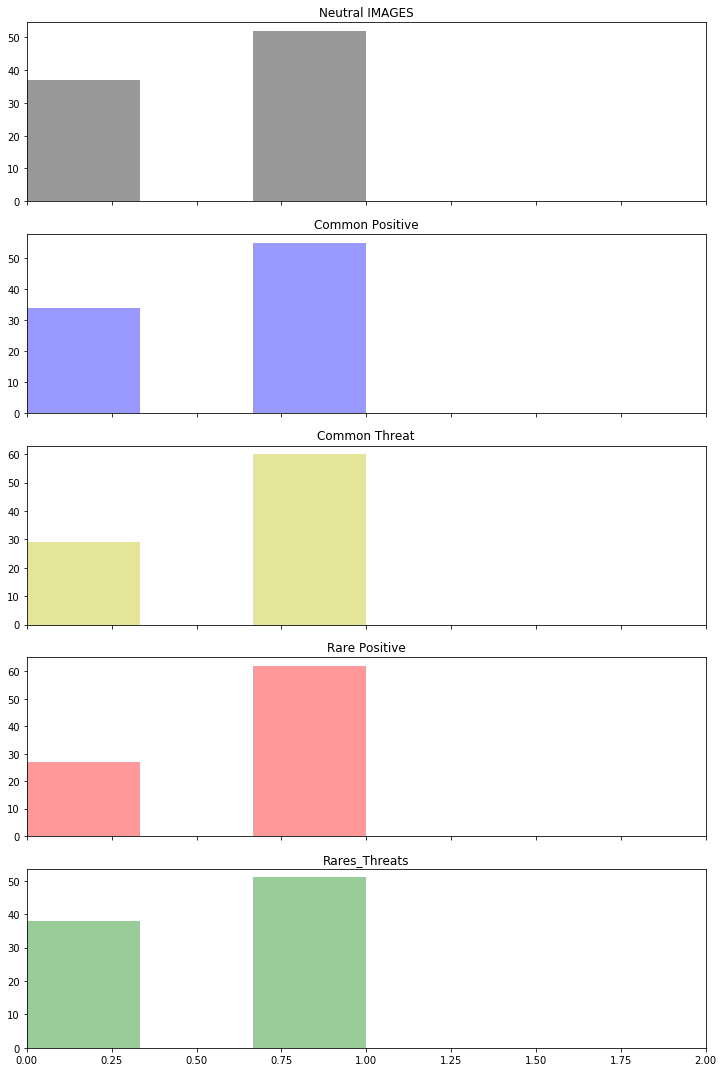

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from bayesian_bootstrap.bootstrap import mean, highest_density_interval
import pandas as pd
from scipy.stats import mode, ttest_rel
from scipy.stats import mode, ttest_1samp as t1
import numpy
# n=[]
# cp=[]
# ct=[]
# rp=[]
# rt=[]

# for sub in range(len(choice_data_3d)):
#     sum_cond=np.sum(choice_data_3d[sub,:,:],axis=1)
#     n.append(sum_cond[0])
#     cp.append(sum_cond[1])
#     ct.append(sum_cond[2])
#     rp.append(sum_cond[3])
#     rt.append(sum_cond[4])

print('50-50 bias {}'.format(np.mean(n1)))
print('length: {}'.format(len(n1)))
unique, counts = numpy.unique(n1, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')


print('neutral IMAGES mean {}'.format(np.mean(n2)))
print('length: {}'.format(len(n2)))
unique, counts = numpy.unique(n2, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('common positive mean {}'.format(np.mean(cp1)))
print('length: {}'.format(len(cp1)))
unique, counts = numpy.unique(cp1, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('common threat mean {}'.format(np.mean(ct1)))
print('length: {}'.format(len(ct1)))
unique, counts = numpy.unique(ct1, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('rare positive mean {}'.format(np.mean(rp1)))
print('length: {}'.format(len(rp1)))
unique, counts = numpy.unique(rp1, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('rare threat mean {}'.format(np.mean(rt1)))
print('length: {}'.format(len(rt1)))
unique, counts = numpy.unique(rt1, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')
print('\n')

print('FIFTY CONDITIONS:')
print('common threat fifty mean {}'.format(np.mean(ctf)))
unique, counts = numpy.unique(ctf, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('common positive fifty mean {}'.format(np.mean(cpf)))
unique, counts = numpy.unique(cpf, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('rare positive fifty mean {}'.format(np.mean(rpf)))
unique, counts = numpy.unique(rpf, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('rare threat fifty mean {}'.format(np.mean(rtf)))
unique, counts = numpy.unique(rtf, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('neutral fifty mean {}'.format(np.mean(n2f)))
unique, counts = numpy.unique(n2f, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')


#graph distributions
f, axs = plt.subplots(5, 1, figsize=(10, 15),sharex=True)

ax0=sns.distplot(n2, hist=True,kde=False,color="k", ax=axs[0])
ax0.set(title='Neutral IMAGES',xlabel='')

ax1=sns.distplot(cp1, hist=True,kde=False,color="b", ax=axs[1])
ax1.set(title='Common Positive',xlabel='')

ax2=sns.distplot(ct1, hist=True,kde=False,color="y", ax=axs[2])
ax2.set(title='Common Threat',xlabel='')

ax3=sns.distplot(rp1, hist=True,kde=False,color="r", ax=axs[3])
ax3.set(title='Rare Positive',xlabel='')

ax4=sns.distplot(rt1, hist=True,kde=False,color="g", ax=axs[4])
ax4.set(title='Rares_Threats',xlabel='')

# ax4=sns.distplot(n1, hist=True,kde=False,color="k", ax=axs[5])
# ax4.set(title='neutral fifty',xlabel='')

plt.tight_layout()
plt.xlim(0, 2)
plt.show()



In [99]:
from scipy.stats import spearmanr as corrS
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from statsmodels.stats.contingency_tables import mcnemar
x=rt1
y=ct1
print(ttest_rel(x,y))

#np.save('clean_data',choice_data_clean)

Ttest_relResult(statistic=-1.821462531184312, pvalue=0.07336161884520226)


In [357]:
x=rp1+rp1
len(x)

192